# SVM: Scikit-learn sobre dataset Digits
M2U5 - Ejercicio 12

## ¿Qué vamos a hacer?
- Descargar el dataset Digits para clasificarlo por OCR
- Preprocesaer el dataset con métodos de Scikit-learn
- Entrenar un modelo de clasificación multiclase con SVM
- Evaluar la precisión del modelo y representarla gráficamente

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Instrucciones
En un ejercicio anterior, hemos resuelto el problema de la clasificación de dígitos escritos a mano por OCR por regresión logística usando Scikit-learn.

Esta aplicación o dataset puede ser complejo, por lo que esperamos que un modelo de clasificación por SVM tenga más precisión sobre el mismo que la regresión logística lineal.

Repite los pasos para entrenar un modelo SVM sobre dicho dataset, optimizarlo por CV con K-fold y evaluarlo finalmente.

Referencias:
- Características del dataset aquí: [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset)
- Función de carga: [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
- Referencia este notebook: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

In [42]:
# TODO: Importa todos los módulos necesarios en esta celda# TODO: Importa todos los módulos necesarios en esta celda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics


## Cargar el dataset Digits

Representa gráficamente algunos de los ejemplos y sus clases o dígitos asociados:

In [43]:
# TODO: Carga el dataset Digits como arrays X e y y representa algunos de los ejemplos
digits = load_digits()

X = digits.data
y = digits.target
df = pd.DataFrame(digits.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


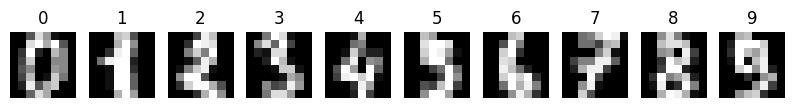

In [44]:
# Representación grafica
n_ejemplos = 10

plt.figure(figsize=(10, 2))
for i in range(n_ejemplos):
    plt.subplot(1, n_ejemplos, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])  #
    plt.axis('off')
plt.show()

## Preprocesar los datos

Preprocesa los datos con métodos de Scikit-learn, del mismo modo que hiciste en el ejercicio de Scikit-learn de regresión logística:

- Reordénalos aleatoriamente.
- Normalízalos si es necesario.
- Divídelos en subsets de entrenamiento y test.

En esta ocasión, de nuevo, haremos la validación cruzada por K-fold.

In [45]:
# TODO: Reordena los datos aleatoriamente, normaliza y divide en entrenamiento, test y CV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Entrena un modelo de clasificación por SVM inicial

Para comprobar el funcionamiento de nuestro clasificador SVC, vamos a entrenar un modelo inicial sobre el subset de entrenamiento y validarlo sobre el subset de test.

Recuerda usar la función [decision_function_shape](https://scikit-learn.org/stable/modules/svm.html#multi-class-classification) para usar el esquema "uno contra el resto" (OVR).

Usa los valores por defecto de *C* y *gamma* para no influir sobre su regularización:

In [46]:
# TODO: Entrena un modelo de SVC sin modificar los parámetros de regularización sobre el subset de entrenamiento
svc = SVC(kernel="rbf", decision_function_shape="ovr", C=1.0, gamma="scale")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

Para evaluar el modelo podemos usar una matriz de confusión. En dicha matriz representamos, para cada una de las clases (10 en este caso), cuántos ejemplos se han predicho correctamente, en cuántos hemos fallado y qué clases habíamos predicho para los mismos.

Puedes representar la matriz de confusión usando la función [sklearn.metrics.plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) que encontrarás en este ejemplo: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

*NOTA:* ¿Te atreves a usar una escala de colores más adecuada para este caso?

In [47]:
# TODO: Evalúa el modelo con su model.score() sobre el subset de test
accuracy = svc.score(X_test, y_test)
print("Precisión:", accuracy)

Precisión: 0.9805555555555555


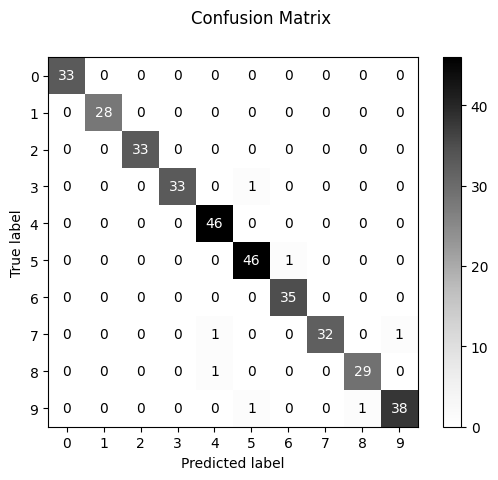

In [55]:
# TODO: Representa gráficamente la matriz de confusión del modelo
# Mostrarla gráficamente
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Greys")
disp.figure_.suptitle("Confusion Matrix")
plt.show()

El modelo discrimina con alta capacidad los diferentes digitos.